# House Prices Competition : Term Project 

#### Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

#### To do List :

* Functions for each data preparation and processing method
* Read about features engineering and selection
* apply pca
* how to select the non_numerical features that are most important 


### Importing Libraries:

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin
import sklearn.preprocessing as pp
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [87]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [88]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
print ("Train data shape:", train.shape)

Train data shape: (1460, 81)


In [90]:
print ("Test data shape:", test.shape)

Test data shape: (1459, 80)


### Data preparation methods:

#### Skewness of the data :

Skewness is a measure of the degree of asymmetry of a distribution. If the left tail (tail at small end of the distribution) is more pronounced than the right tail (tail at the large end of the distribution), the function is said to have negative skewness. If the reverse is true, it has positive skewness. If the two are equal, it has zero skewness.

Skew is: 1.88287575977


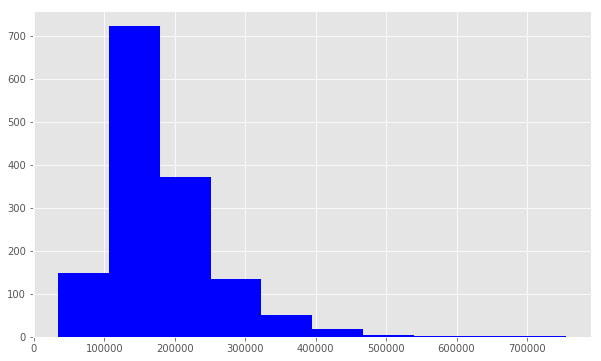

In [91]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

We apply log function to have zero skew 

Skew is: 0.121335062205


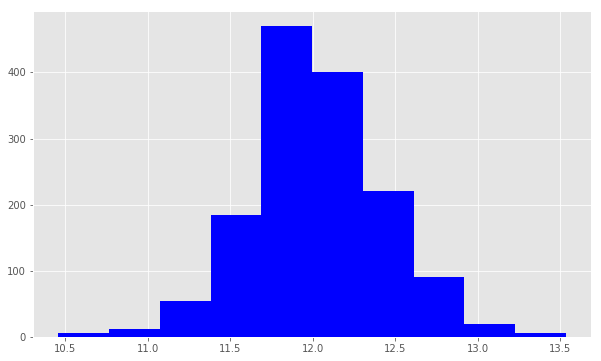

In [92]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

### Methods to handle Null values :

In [93]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
#nulls

In [94]:
numericals_train = train.select_dtypes(include=[np.number])
numericals_test = test.select_dtypes(include=[np.number])

#### Interpolation

we fill the missing values with an average value.

In [95]:
data_train_interpolated = numericals_train.interpolate().dropna()
sum(data_train_interpolated.isnull().sum() != 0)

0

In [96]:
data_test_interpolated = numericals_test.interpolate().dropna()
sum(data_test_interpolated.isnull().sum() != 0)

0

#### Imputing:  
to replace the null value with : 

* A constant value that has meaning within the domain, such as 0, distinct from all other values.
* A value from another randomly selected record.
* A mean, median or mode value for the column.
* A value estimated by another predictive model.

In [97]:
#Todo: problem woth imputing, returns np array

from sklearn.preprocessing import Imputer
my_imputer = Imputer()
#train_set = numericals_train.drop(['SalePrice', 'Id'], axis=1)
#test_set = numericals_test.drop(['Id'], axis=1)


train_with_imputed_values = my_imputer.fit_transform(numericals_train)
test_with_imputed_values = my_imputer.fit_transform(numericals_test)

We can also fill with zero :

In [98]:
data_with_zeros_train = train_set.fillna(0)
data_with_zeros_test = test_set.fillna(0)

We can drop them,but it's not a recomanded method, because there is a possibility that the test set will have missing values in places where the training data did not, this will result in an error.

### Numerical Values Normalization

Selecting only numerical features

Normalizing train and test datasets numerical values (putting all values between 0 and 1)

In [99]:
data_train_interpolated = data_train_interpolated.drop(['Id'], axis=1)
data_test_interpolated = data_test_interpolated.drop(['Id'], axis=1)


col_train = list(data_train_interpolated.columns)
col_train_bis = list(data_train_interpolated.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(data_train_interpolated)
mat_test  = np.matrix(data_test_interpolated)
mat_new = np.matrix(data_train_interpolated.drop('SalePrice',axis = 1))
mat_y = np.array(data_train_interpolated.SalePrice).reshape((1460,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train_set = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test_set  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

train_set.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [100]:
test_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.0000,0.082920,0.097693,...,0.514810,0.163361,0.000000,0.0,0.0,0.25,0.0,0.000000,0.454545,1.0
1,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.0675,0.163536,0.000000,...,0.220028,0.458576,0.065814,0.0,0.0,0.00,0.0,0.806452,0.454545,1.0
2,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.0000,0.140149,0.000000,...,0.339915,0.247375,0.062157,0.0,0.0,0.00,0.0,0.000000,0.181818,1.0
3,0.235294,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.0125,0.106662,0.000000,...,0.331453,0.420070,0.065814,0.0,0.0,0.00,0.0,0.000000,0.454545,1.0
4,0.588235,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.0000,0.046598,0.000000,...,0.356841,0.000000,0.149909,0.0,0.0,0.30,0.0,0.000000,0.000000,1.0


### Ranking numerical features using lasso function

In [101]:
X = train_set
X1 = X.drop(['SalePrice'],axis = 1)
y = X.SalePrice

### Applying lasso function
The Lasso is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. For this reason, the Lasso and its variants are fundamental to the field of compressed sensing. Under certain conditions, it can recover the exact set of non-zero weights (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).

In [102]:
lasso=Lasso(alpha=0.001)
lasso.fit(X1,y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X1.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
OverallQual,0.259389
GrLivArea,0.254392
GarageCars,0.069694
BsmtFullBath,0.043146
Fireplaces,0.042071
MasVnrArea,0.036949
YearRemodAdd,0.030350
YearBuilt,0.027436
1stFlrSF,0.015466
WoodDeckSF,0.012159


In [107]:
# store the new data
train_numericals = train_set
%store train_numericals

test_numericals = test_set
%store test_numericals

Stored 'train_numericals' (DataFrame)
Stored 'test_numericals' (DataFrame)
